In [73]:
from sklearn import datasets
iris = datasets.load_iris() # array data

In [74]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [75]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [76]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [77]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [78]:
import pandas as pd
df = pd.DataFrame({'sepal_length' : iris.data[:, 0],
                   'sepal_width' : iris.data[:, 1],
                   'petal_length' : iris.data[:, 2],
                   'petal_width' : iris.data[:, 3],
                   'species' : iris.target
                   })

In [79]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [82]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [83]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

In [85]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
94,5.6,2.7,4.2,1.3
87,6.3,2.3,4.4,1.3
29,4.7,3.2,1.6,0.2
2,4.7,3.2,1.3,0.2
127,6.1,3.0,4.9,1.8
...,...,...,...,...
75,6.6,3.0,4.4,1.4
43,5.0,3.5,1.6,0.6
22,4.6,3.6,1.0,0.2
72,6.3,2.5,4.9,1.5


>

>

# RandomForestClassifier

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

species_classifier = RandomForestClassifier()
param_space = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90 , 100],
               'max_leaf_nodes': [10, 20, 30, 40, 50],
               'criterion': ['gini', 'entropy']}

clf = GridSearchCV(species_classifier, param_space, cv = 3)

In [87]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [88]:
clf.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 10, 'n_estimators': 40}

In [89]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
accuracy_score(y_train, y_train_pred)

1.0

In [92]:
accuracy_score(y_test, y_test_pred)

0.9565217391304348

In [93]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 44,  0],
       [ 0,  0, 44]])

In [94]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0,  6]])

In [95]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        44

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



In [96]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.86      1.00      0.92         6

    accuracy                           0.96        23
   macro avg       0.95      0.94      0.94        23
weighted avg       0.96      0.96      0.96        23



In [97]:
clf.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 10, 'n_estimators': 40}

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf_final = RandomForestClassifier(max_leaf_nodes = 10, n_estimators = 40)
clf_final.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=10, n_estimators=40)

In [104]:
clf_final.feature_importances_

array([0.09283939, 0.03875286, 0.50576681, 0.36264094])

In [105]:
fea_imp = pd.Series(clf_final.feature_importances_, index = iris.feature_names).sort_values(ascending = False)

In [106]:
fea_imp

petal length (cm)    0.505767
petal width (cm)     0.362641
sepal length (cm)    0.092839
sepal width (cm)     0.038753
dtype: float64

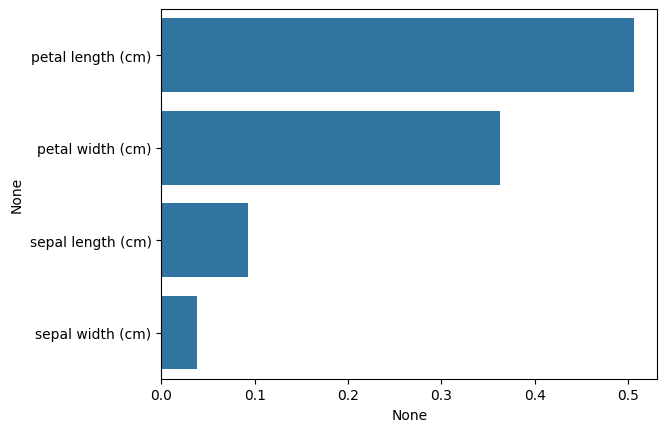

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = fea_imp, y = fea_imp.index)
plt.show()